In [1]:
# core
import sys

# custom
sys.path.append('../code')
import data_processing as dp
import short_squeeze_eda as sse

# installed
import numpy as np

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [2]:
short_stocks = sse.get_stocks()
dfs, sh_int, fin_sh = dp.load_stocks(stocks=short_stocks, verbose=True)

loading stocks...
calculating TAs...
getting finra shorts and merging...
getting short interest and merging...


In [3]:
dfs['A'].head()

,Date,Ticker,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,...,ht_ph_cl,ht_ph_tp,ht_q_cl,ht_q_tp,ht_s_cl,ht_s_tp,ht_ls_cl,ht_ls_tp,ht_tr_cl,ht_tr_tp
0,2015-01-02,A,41.18,41.31,40.37,40.56,1530798.0,0.1,1.0,40.038776,...,0.200688,0.140002,0.340746,0.340821,0.93754,0.999712,0.416954,0.723883,0,0
1,2015-01-05,A,40.32,40.46,39.70,39.80,2042240.0,0.0,1.0,39.202610,...,0.200688,0.140002,0.340746,0.340821,0.93754,0.999712,0.416954,0.723883,0,0
2,2015-01-06,A,39.81,40.02,39.02,39.18,2084562.0,0.0,1.0,38.706743,...,0.200688,0.140002,0.340746,0.340821,0.93754,0.999712,0.416954,0.723883,0,0
3,2015-01-07,A,39.52,39.81,39.29,39.70,3359660.0,0.0,1.0,38.424780,...,0.200688,0.140002,0.340746,0.340821,0.93754,0.999712,0.416954,0.723883,0,0
4,2015-01-08,A,40.24,40.98,40.18,40.89,2116341.0,0.0,1.0,39.124827,...,0.200688,0.140002,0.340746,0.340821,0.93754,0.999712,0.416954,0.723883,0,0


In [4]:
sh_int['A'].head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,ht_ls_tp,ht_tr_cl,ht_tr_tp,Total Short Interest,Days to Cover,Short % of Float,% Insider Ownership,% Institutional Ownership,Shares: Float,Short Squeeze Ranking
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,38.43,38.5800,37.6462,38.19,1989379.0,0.0,1.0,37.762049,37.909441,36.991872,...,-0.428255,1,1,6455100.0,3.7,1.95,0.39,85.2,331290000.0,-1.0
2016-01-13,38.35,38.4700,36.7150,36.86,4206638.0,0.0,1.0,37.683439,37.801353,36.076857,...,-0.173188,1,1,6455100.0,3.7,1.95,0.39,85.2,331290000.0,-1.0
2016-01-14,36.94,37.8799,36.5500,37.61,2893372.0,0.0,1.0,36.297946,37.221510,35.914725,...,0.048490,1,1,6455100.0,3.7,1.95,0.39,85.2,331290000.0,-1.0
2016-01-15,36.67,37.5600,36.5500,37.11,2994386.0,0.0,1.0,36.032639,36.907170,35.914725,...,0.328330,1,1,6455100.0,3.7,1.95,0.39,85.2,331290000.0,-1.0
2016-01-19,37.64,37.9200,36.7900,37.20,2506559.0,0.0,1.0,36.985780,37.260913,36.150553,...,0.507164,1,1,6455100.0,3.7,1.95,0.39,85.2,331290000.0,-1.0


In [5]:
fin_sh['A'].head()

,Date,Ticker,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,...,ht_q_tp,ht_s_cl,ht_s_tp,ht_ls_cl,ht_ls_tp,ht_tr_cl,ht_tr_tp,ShortVolume,ShortExemptVolume,TotalVolume
0,2016-11-01,A,43.73,44.110,43.14,43.49,2133116.0,0.0,1.0,43.309742,...,-3.259428,-0.058533,-0.073404,0.664506,0.653295,1,1,138699.0,27.0,329468.0
1,2016-11-02,A,43.47,43.730,43.24,43.26,2240428.0,0.0,1.0,43.052241,...,-1.288984,0.019890,-0.011377,0.721031,0.699016,1,1,232985.0,361.0,429450.0
2,2016-11-03,A,43.33,44.000,43.18,43.66,2510054.0,0.0,1.0,42.913587,...,1.081034,0.076145,0.050516,0.758896,0.741924,1,1,204196.0,100.0,445586.0
3,2016-11-04,A,43.69,44.915,43.69,44.32,2220908.0,0.0,1.0,43.270127,...,1.725586,0.132846,0.142894,0.794776,0.800891,1,1,314585.0,12.0,468595.0
4,2016-11-07,A,44.99,45.760,44.95,45.71,1723957.0,0.0,1.0,44.557633,...,2.098037,0.248522,0.235767,0.860654,0.853885,1,1,158093.0,964.0,329802.0


# find largest short squeeze rankings

In [6]:
maxes, mins = [], []
for s in sorted(sh_int.keys()):
    maxes.append(sh_int[s]['Short Squeeze Ranking'].max())
    mins.append(sh_int[s]['Short Squeeze Ranking'].min())

maxes = np.nan_to_num(np.array(maxes))
mins = np.nan_to_num(np.array(mins))

In [7]:
max_idx = np.argsort(maxes)[::-1]  # largest to smallest
min_idx = np.argsort(mins)  # want to have most negative first

In [8]:
stks = np.array(sorted(sh_int.keys()))

In [9]:
for s, m in zip(stks[max_idx][:20], maxes[max_idx][:20]):
    print(s, m)

INFO 1050.47
CBLI 210.25
BEBE 147.31
ATLC 145.84
ZGNX 98.11
AVXL 85.51
MNI 71.56
VLTC 70.08
NHTC 63.71
REN 55.33
LXRX 54.34
EXAS 48.03
INTX 45.55
NYMX 38.5
CRK 30.37
OREX 29.07
BAS 26.89
AAMC 26.66
CRC 25.13
XBKS 23.51


In [10]:
for s, m in zip(stks[min_idx][:20], mins[min_idx][:20]):
    print(s, m)

INTX -71.05
CAS -27.37
CDZI -24.82
ATLC -23.61
ESI -22.84
BONT -21.98
VHC -20.1
VTNR -17.79
KNDI -14.83
FUEL -14.09
NVAX -13.3
AAC -12.74
MNKD -12.55
AUMN -11.98
HGG -11.95
CPSI -11.28
FRPT -11.19
EAC -11.02
BIOS -10.88
SHLD -10.39


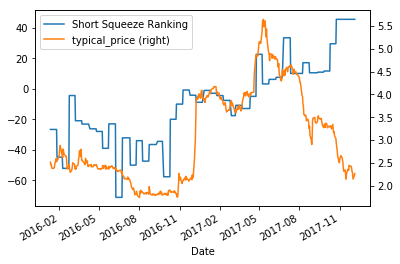

In [11]:
sh_s = sh_int['INTX']
f = plt.figure()
ax = plt.gca()
sh_s.plot(y='Short Squeeze Ranking', ax=ax)
sh_s.plot(y='typical_price', ax=ax, secondary_y=True)
plt.show()

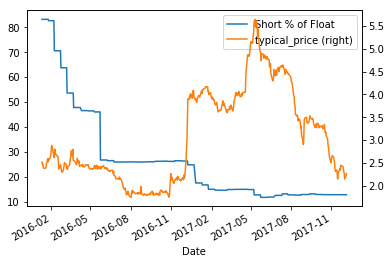

In [12]:
sh_s = sh_int['INTX']
f = plt.figure()
ax = plt.gca()
sh_s.plot(y='Short % of Float', ax=ax)
sh_s.plot(y='typical_price', ax=ax, secondary_y=True)
plt.show()

In [13]:
sh_int['INTX'].tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,ht_ls_tp,ht_tr_cl,ht_tr_tp,Total Short Interest,Days to Cover,Short % of Float,% Insider Ownership,% Institutional Ownership,Shares: Float,Short Squeeze Ranking
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-29,2.28,2.4319,2.1500,2.3300,56011.0,0.0,1.0,2.28,2.4319,2.1500,...,0.994260,1,1,1000100.0,175.5,12.96,48.14,40.3,7719200.0,45.55
2017-11-30,2.33,2.3942,2.2000,2.2300,39859.0,0.0,1.0,2.33,2.3942,2.2000,...,0.986146,1,1,1000100.0,175.5,12.96,48.14,40.3,7719200.0,45.55
2017-12-01,2.22,2.2200,2.0140,2.2000,51543.0,0.0,1.0,2.22,2.2200,2.0140,...,0.944100,1,1,1000100.0,175.5,12.96,48.14,40.3,7719200.0,45.55
2017-12-04,2.20,2.3800,2.1200,2.1501,19511.0,0.0,1.0,2.20,2.3800,2.1200,...,0.760854,1,1,1000100.0,175.5,12.96,48.14,40.3,7719200.0,45.55
2017-12-05,2.25,2.3801,2.1353,2.2800,22543.0,0.0,1.0,2.25,2.3801,2.1353,...,0.576990,1,1,1000100.0,175.5,12.96,48.14,40.3,7719200.0,45.55


# get current max/mins of short squeeze ranking

In [14]:
latest_ss = []
for s in sorted(sh_int.keys()):
    if sh_int[s].shape[0] != 0 and 'Short Squeeze Ranking' in sh_int[s].columns:
        latest_ss.append(sh_int[s].iloc[-1]['Short Squeeze Ranking'])
    else:
        latest_ss.append(0)

latest_ss = np.nan_to_num(np.array(latest_ss))
latest_idx = np.argsort(latest_ss)[::-1]
latest_idx_rev = latest_idx[::-1]

In [15]:
for s, m in zip(stks[latest_idx][:20], latest_ss[latest_idx][:20]):
    print(s, m)

INFO 747.0
VLTC 70.08
REN 49.18
INTX 45.55
CRC 24.78
MNI 21.66
GNMK 19.86
AAMC 18.48
STRP 17.92
EXAS 17.24
CDZI 16.24
BAS 14.98
XBKS 14.98
CLVS 13.93
SLTD 13.09
EGRX 12.69
SGY 11.97
TDOC 11.16
CHGG 11.02
CRK 9.38


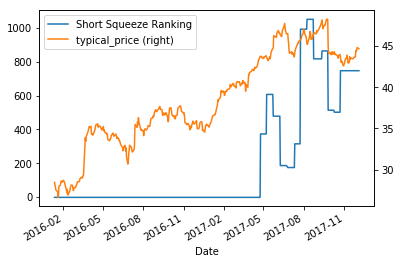

In [16]:
sh_s = sh_int['INFO']
f = plt.figure()
ax = plt.gca()
sh_s.plot(y='Short Squeeze Ranking', ax=ax)
sh_s.plot(y='typical_price', ax=ax, secondary_y=True)
plt.show()

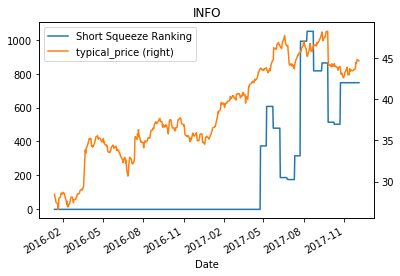

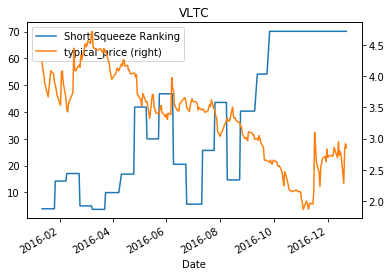

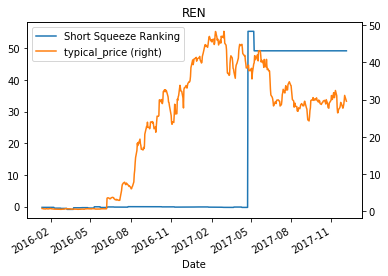

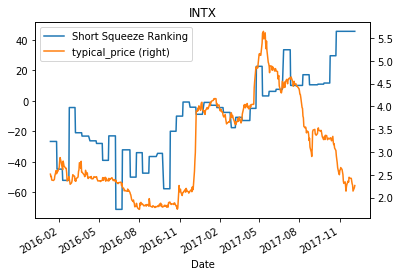

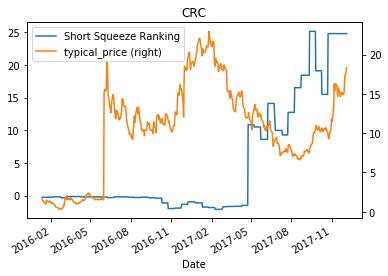

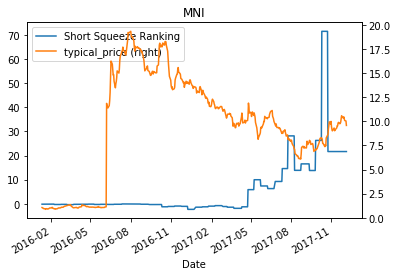

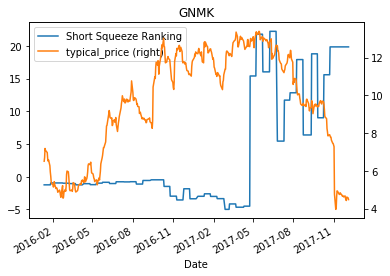

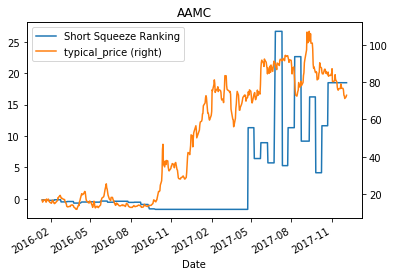

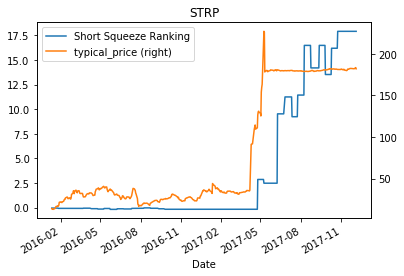

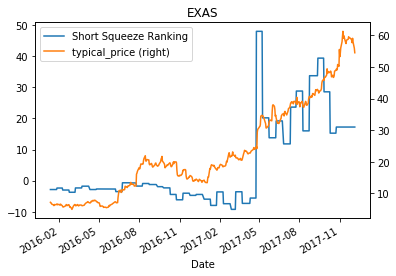

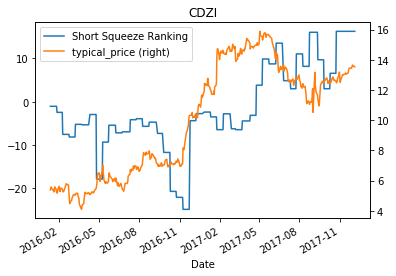

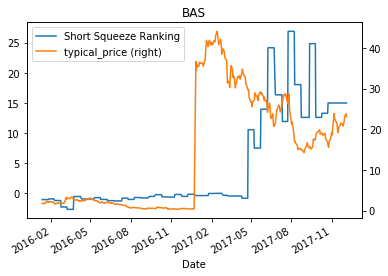

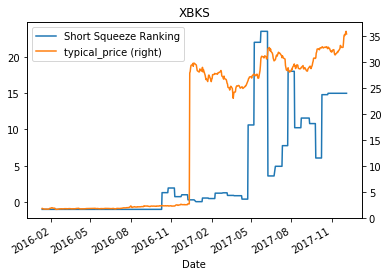

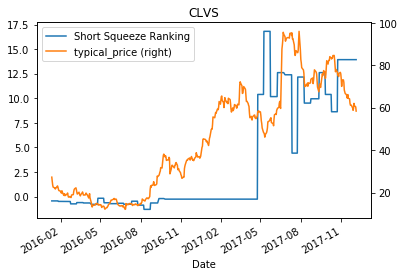

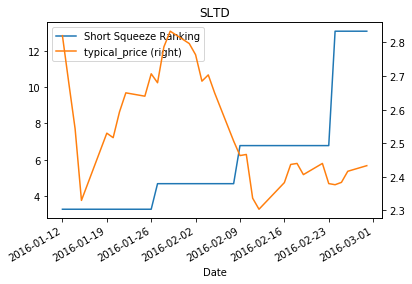

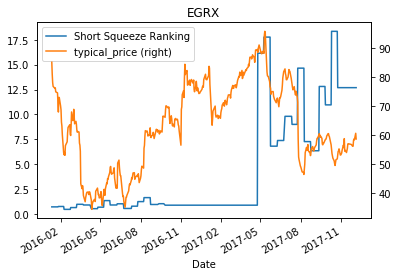

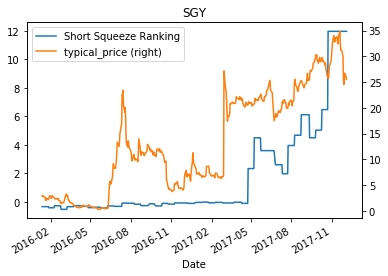

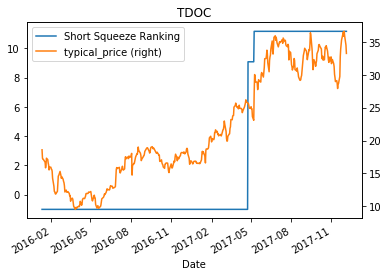

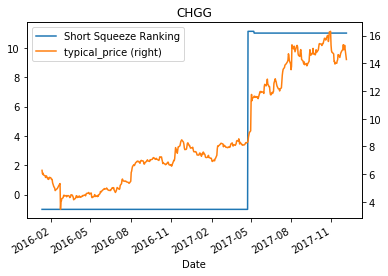

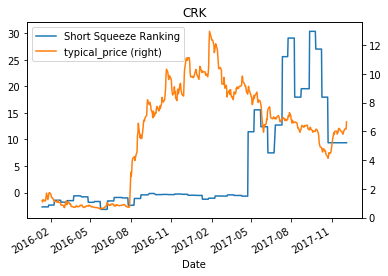

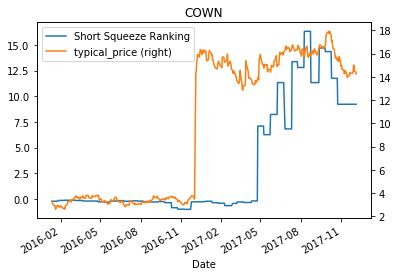

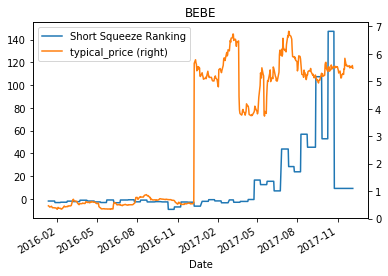

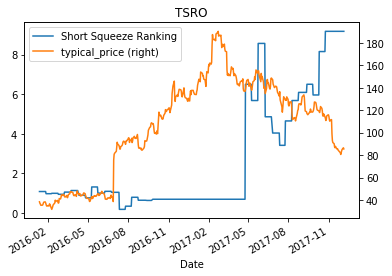

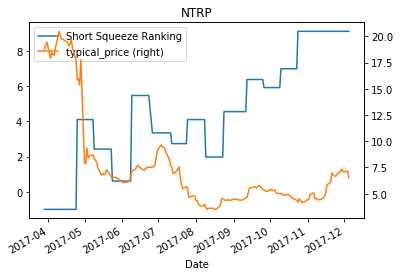

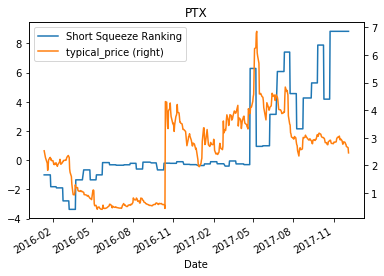

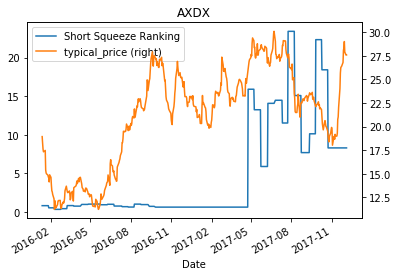

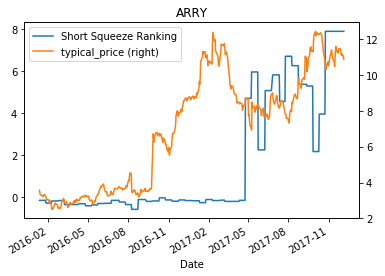

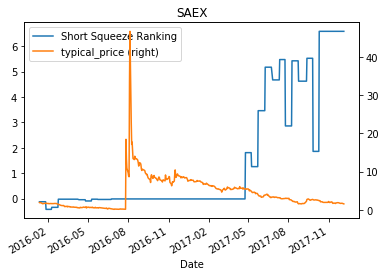

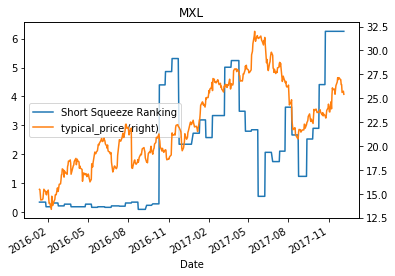

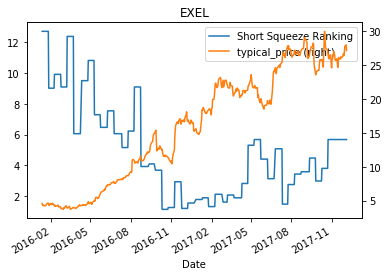

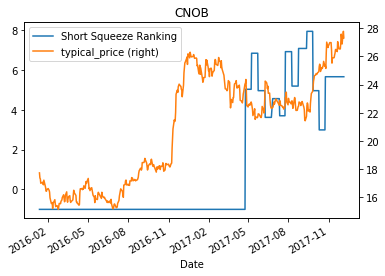

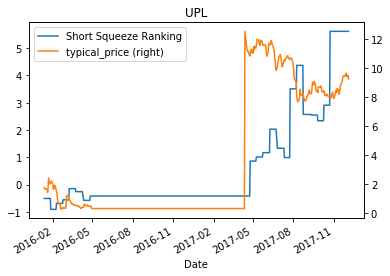

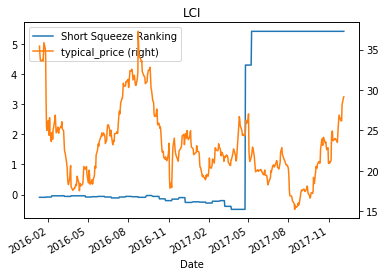

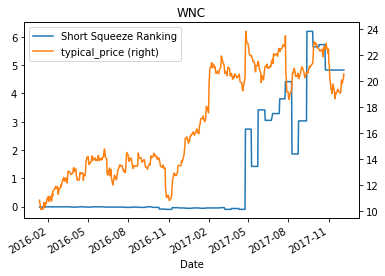

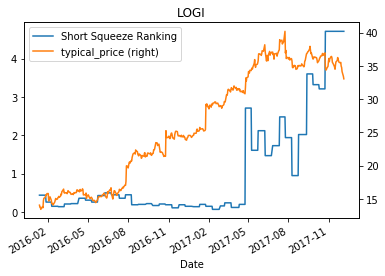

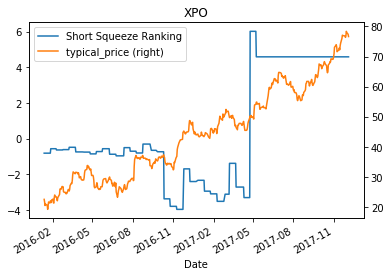

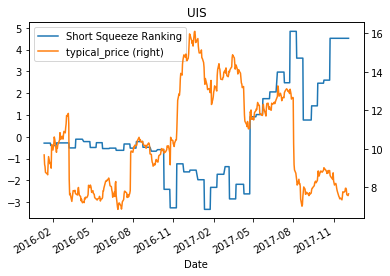

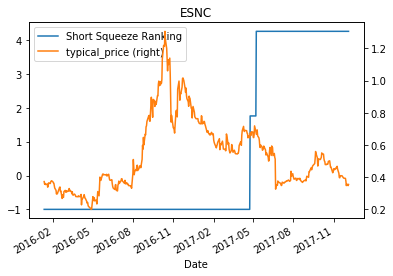

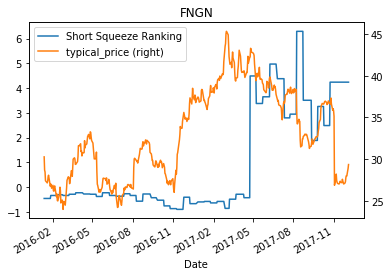

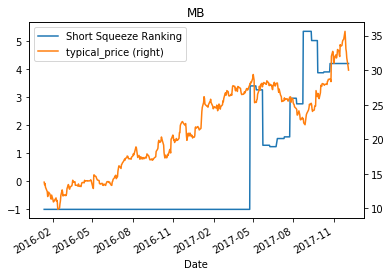

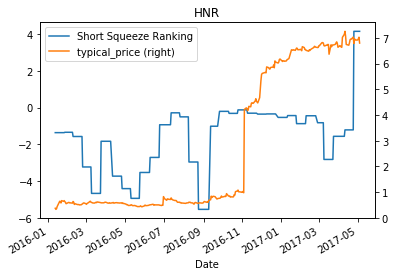

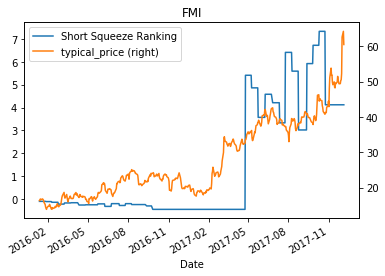

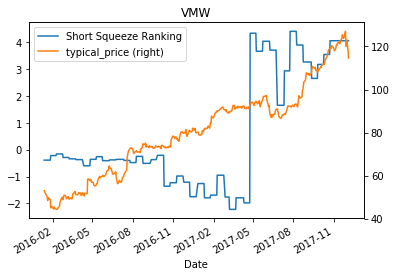

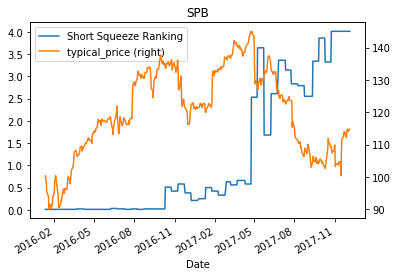

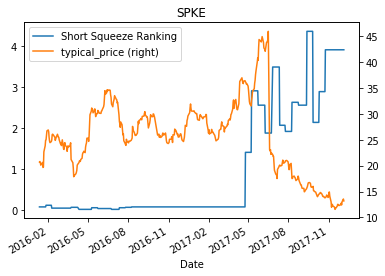

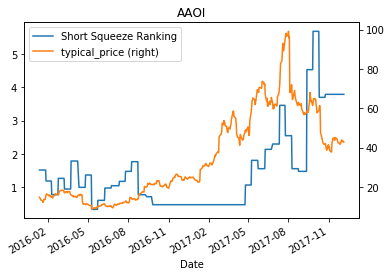

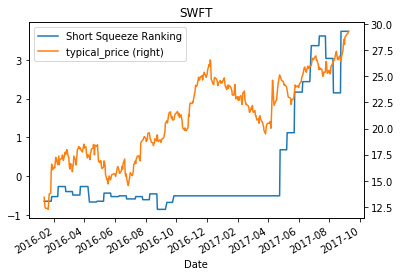

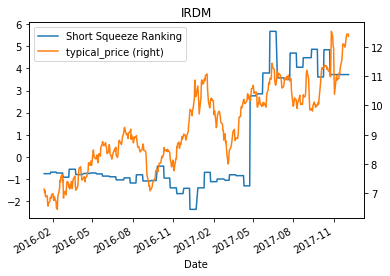

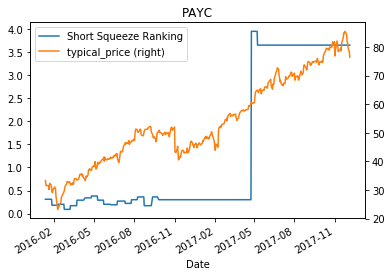

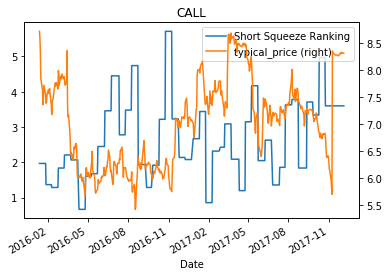

In [17]:
for s, m in zip(stks[latest_idx][:50], latest_ss[latest_idx][:50]):
    sh_s = sh_int[s]
    f = plt.figure()
    plt.title(s)
    ax = plt.gca()
    sh_s.plot(y='Short Squeeze Ranking', ax=ax)
    sh_s.plot(y='typical_price', ax=ax, secondary_y=True)
    plt.show()

In [18]:
for s, m in zip(stks[latest_idx_rev][:20], latest_ss[latest_idx_rev][:20]):
    print(s, m)

ESI -16.59
AAC -12.74
ATLC -11.08
VTNR -11.01
KONA -8.55
IRMD -7.74
NVAX -7.47
COTY -7.34
CXRX -6.76
FRSH -6.05
SSI -5.86
CIE -5.78
PSIX -5.03
PN -4.81
CPSI -4.7
CRR -4.29
CLDN -4.22
CALM -3.98
PDVW -3.94
BETR -3.77
